In [1]:
import pandas as pd
import numpy as np


In [2]:
train=pd.read_csv("data/titanic/train.csv")
test=pd.read_csv("data/titanic/test.csv")
train
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
#탐색적 분석(EDA;Exploratory Data Analysis)
train.head(50)
#train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
train.isnull().sum()
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#성별에 따른 생존률
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [6]:
train.pivot_table(index='Sex', values='Survived', aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [7]:
train.pivot_table(index='Sex')

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [8]:
train.groupby('Sex')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [9]:
#성별, 선실등급별 생존률 출력
train.pivot_table('Survived',['Sex', 'Pclass'],aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [10]:
test['Survived']=(test.Sex=='female') & (test.Age > 0) & (test.Embarked)
test.head()
#test['Survived']=(test.)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [11]:
submission=test[['PassengerId','Survived']].copy()
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null bool
dtypes: bool(1), int64(1)
memory usage: 3.8 KB


In [12]:
submission['Survived']=submission['Survived'].astype(int)
submission.head()
submission.to_csv("submission.csv", index=False)

In [13]:
train.columns
import missingno as msno
msno.matrix(train)

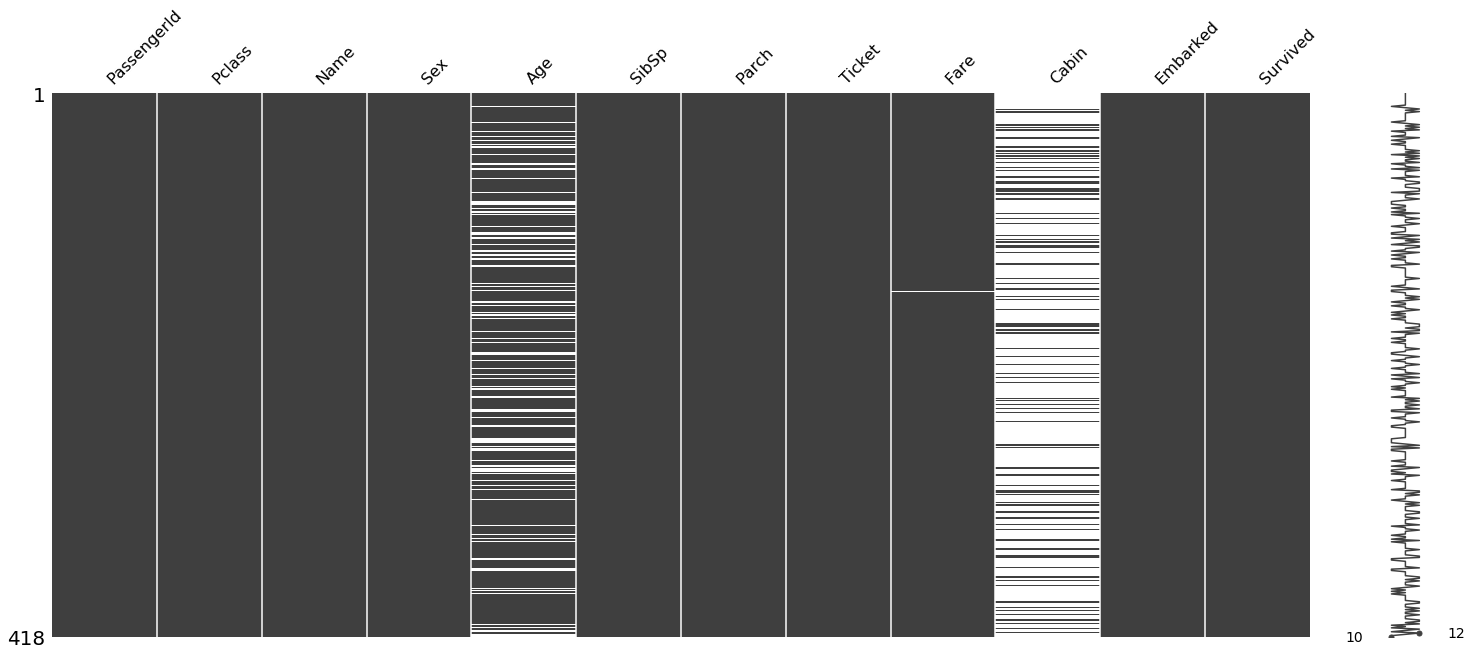

In [14]:
msno.matrix(test)

In [15]:
#plotnine
from plotnine import *

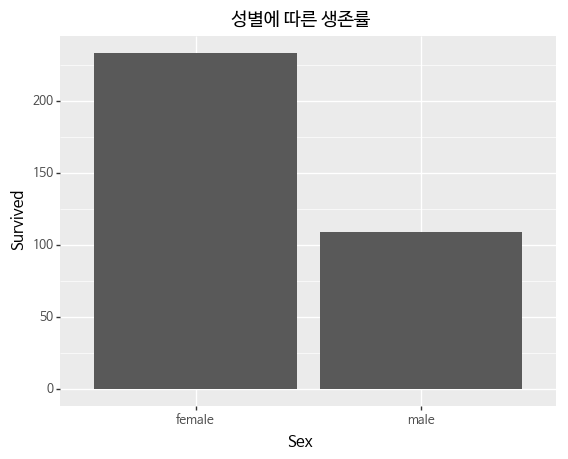

<ggplot: (140689617328)>

In [16]:
(ggplot(train)
 + aes(x='Sex', y='Survived')
 + geom_col()
 + ggtitle('성별에 따른 생존률')
 + theme(text=element_text(family='NanumBarunGothic'))
)

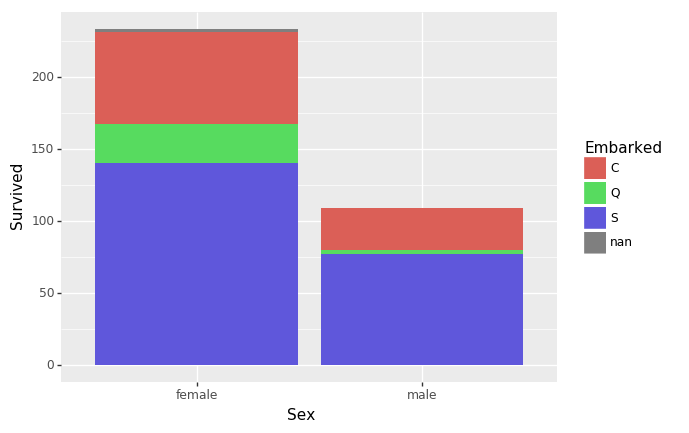

<ggplot: (-9223371896165147427)>

In [17]:
(ggplot(train)
 +aes(x='Sex', y='Survived', fill='Embarked')
 +geom_col()
)

In [18]:
#Pclass별로 데이터 건수 출력
train['Pclass'].value_counts()
#train.info()
#정수->문자형
train['Pclass']=train['Pclass'].astype('str')

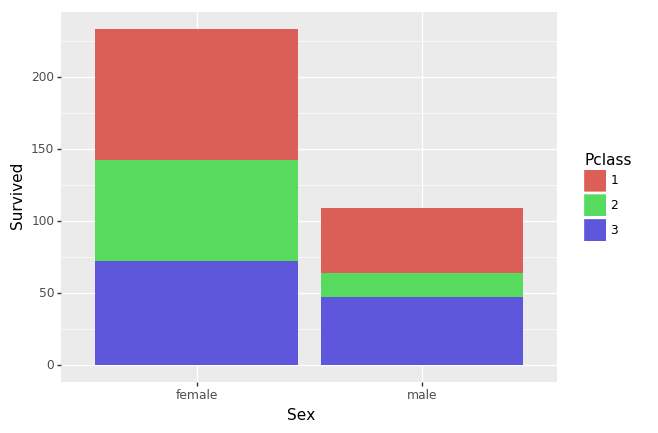

<ggplot: (-9223371896164951573)>

In [19]:
(ggplot(train)
 +aes(x='Sex', y='Survived', fill='Pclass')
 +geom_col()
)

In [20]:
train_drop_age=train['Age'].dropna()
train_drop_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


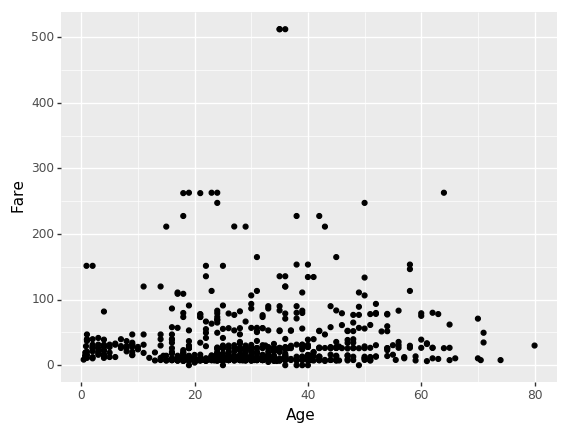

<ggplot: (-9223371896164924514)>

In [21]:
(ggplot(train)
+ aes(x='Age', y='Fare')
 + geom_point()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


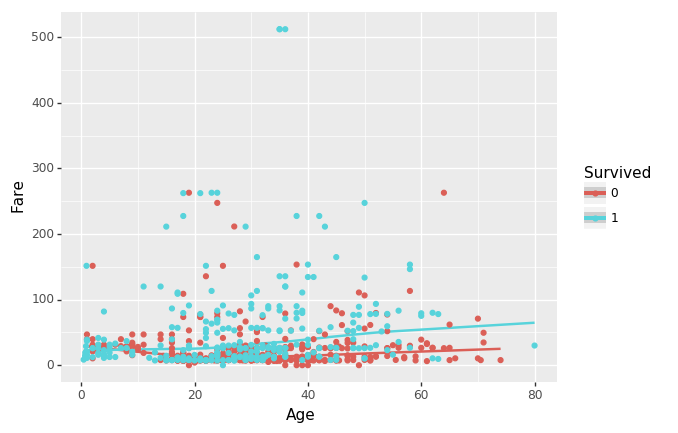

<ggplot: (-9223371896165005301)>

In [22]:
train['Survived']=train['Survived'].astype('category')
(ggplot(train)
+ aes(x='Age', y='Fare', color='Survived')
 +stat_smooth()
 + geom_point()
)
#연령대(x)와 운임(y) 생존률

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


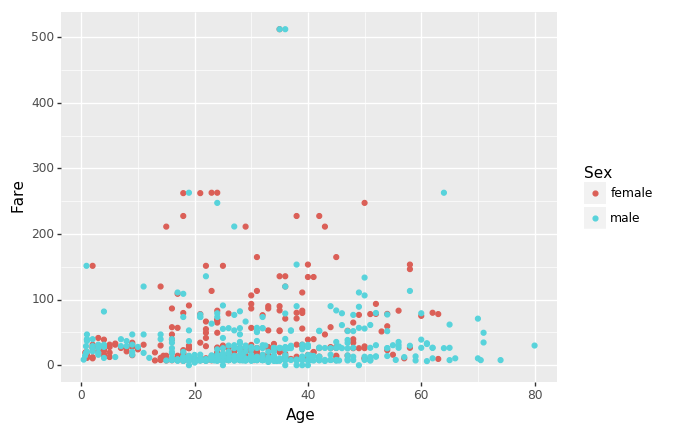

<ggplot: (140690024105)>

In [23]:
(ggplot(train)
+ aes(x='Age', y='Fare', color='Sex')
 + geom_point()
)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 77.6+ KB


C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


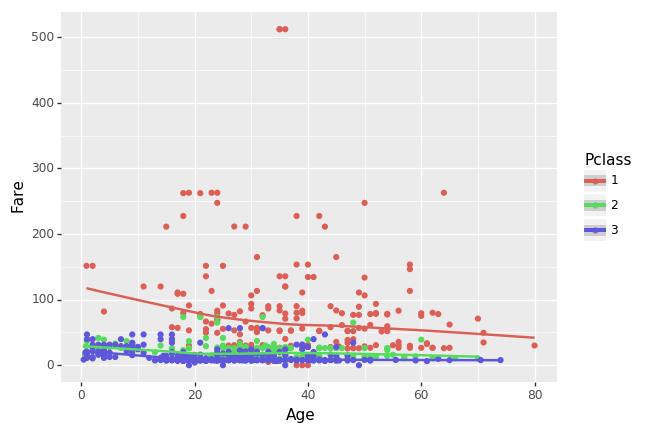

<ggplot: (140690020500)>

In [25]:
(ggplot(train)
+ aes(x='Age', y='Fare', color='Pclass')
 + geom_point()
 +stat_smooth()
)

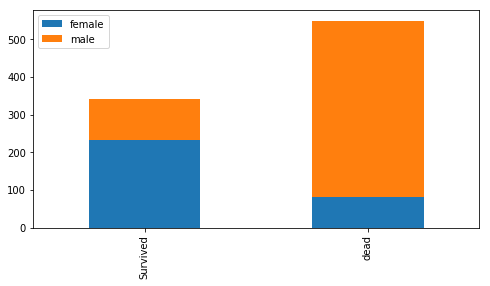

In [26]:
def bar_chart(f):
    survived=train[train['Survived']==1][f].value_counts()
    dead=train[train['Survived']==0][f].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['Survived', 'dead']
    #print(df)
    #df.plot(kind='bar')
    df.plot(kind='bar', stacked=True, figsize=(8,4))

bar_chart('Sex') #성별에 따른 생존자수를 막대그래프

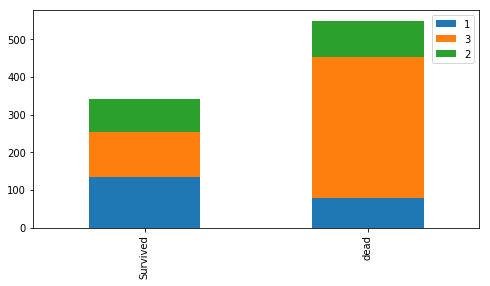

In [27]:
bar_chart('Pclass') 

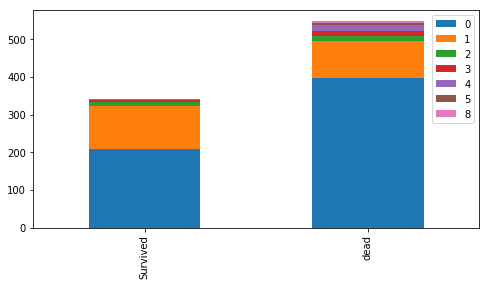

In [28]:
bar_chart('SibSp') 

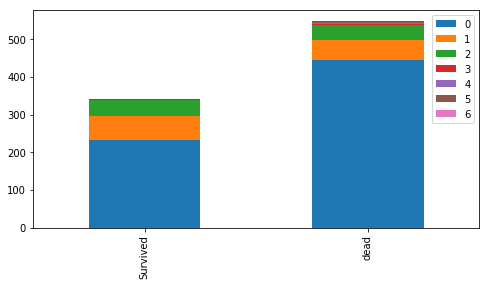

In [29]:
bar_chart('Parch') 

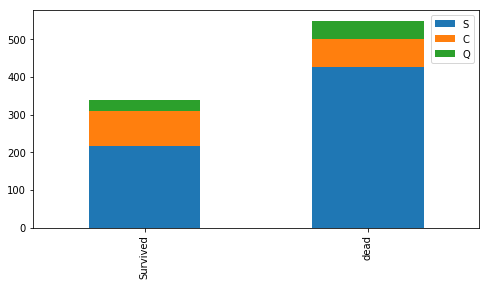

In [30]:
bar_chart('Embarked') 

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


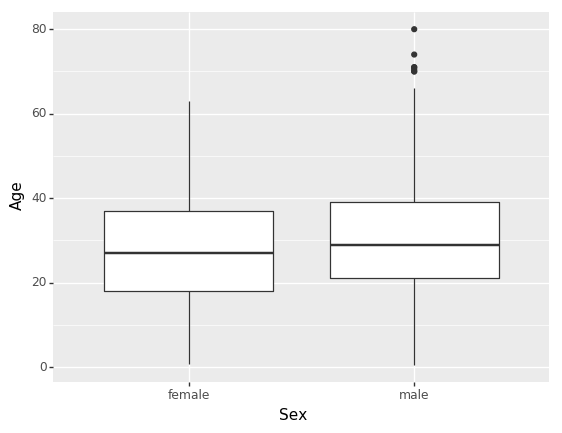

<ggplot: (140690006697)>

In [31]:
(ggplot(train)
+aes(x='Sex', y='Age')
 +geom_boxplot()
)

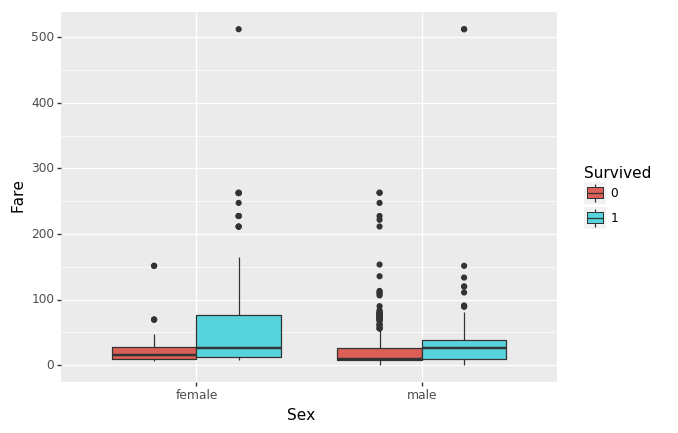

<ggplot: (140689761400)>

In [32]:
(ggplot(train)
+aes(x='Sex', y='Fare', fill='Survived')
 +geom_boxplot()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


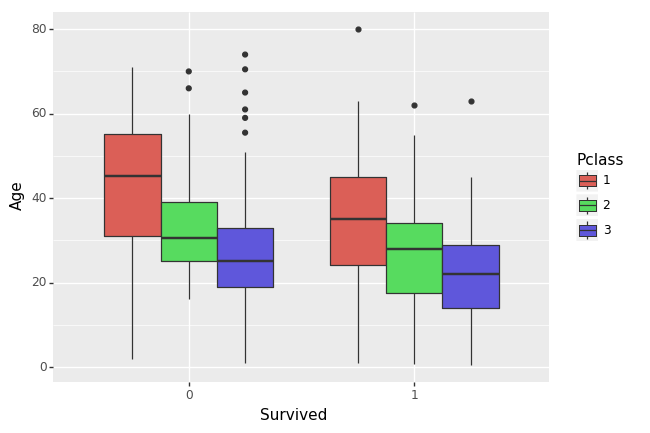

<ggplot: (140690005417)>

In [33]:
(ggplot(train)
+aes(x='Survived', y='Age', fill='Pclass')
 +geom_boxplot()
)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(1), float64(2), int64(3), object(6)
memory usage: 77.6+ KB


In [35]:
train['Age_median']=train['Age']
train['Age_mean']=train['Age']
train['Age_mode']=train['Age']

train['Age_median']=train['Age_median'].fillna(train['Age_median'].median())
train['Age_mean'].fillna(train['Age_mean'].mean(), inplace=True)
#train.info()
train['Age_mode'].fillna(train['Age_mode'].mode()[0], inplace=True)
#print(type(train['Age_mode'].mode()))
#print(train['Age_mean'].mean())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_median     891 non-null float64
Age_mean       891 non-null float64
Age_mode       891 non-null float64
dtypes: category(1), float64(5), int64(3), object(6)
memory usage: 98.5+ KB


C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_bin : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


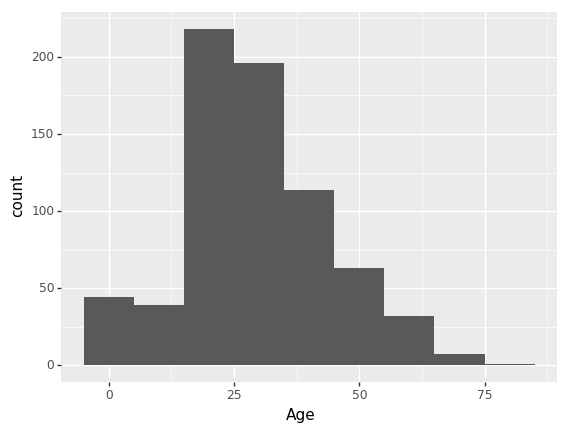

<ggplot: (-9223371896164746275)>

In [36]:
#연령대 분포
(ggplot(train)
+aes(x='Age')
 +geom_histogram(binwidth=10)
)

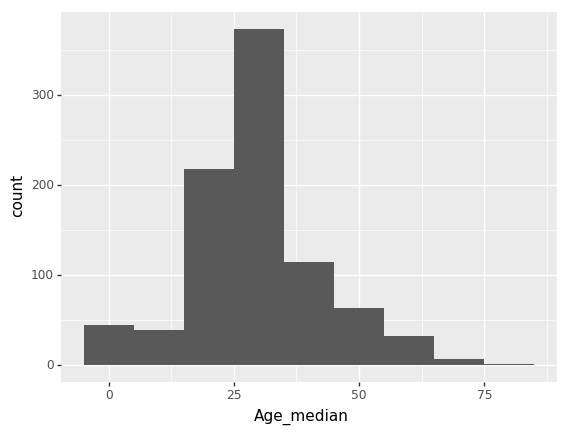

<ggplot: (140690042888)>

In [37]:
(ggplot(train)
+aes(x='Age_median')
 +geom_histogram(binwidth=10)
)

In [41]:
train_test_data=[train,test]
train_test_data

for data in train_test_data:
    print(data['Name'])
#정규표현식 사용 -> 호칭 추출 -> 호칭별 건수 출력
#1번 문제
#출력 예시(test, train)
#Mr     500
#Miss   200
#...    ...
#Sir    1
#2번 문제
#Mr:0, Miss:1, Mrs:2, 나머지는 모두 3으로 처리
#별도의 컬럼을 추가해서 저장
#카페에 제출...


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [42]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_mean,Age_mode,title,titleNo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.000000,22.0,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.000000,38.0,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.000000,26.0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.000000,35.0,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.000000,35.0,Mr,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0,29.699118,24.0,Mr,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0,54.000000,54.0,Mr,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0,2.000000,2.0,Master,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0,27.000000,27.0,Mrs,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0,14.000000,14.0,Mrs,3


In [45]:
for data in train_test_data:
    data['title'] = data['Name'].str.extract("\, ([a-zA-Z]+)[.]")
for data in train_test_data:
    print(data['title'].value_counts())
for data in train_test_data:
    data['titleNo'] = np.where(data['title'] == "Mr" , 0 , np.where ( data['title'] == "Miss" , 1 , 3))
for data in train_test_data:
    print(data[['title','titleNo']][:10])

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Capt          1
Mme           1
Jonkheer      1
Sir           1
Don           1
Ms            1
Name: title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: title, dtype: int64
    title  titleNo
0      Mr        0
1     Mrs        3
2    Miss        1
3     Mrs        3
4      Mr        0
5      Mr        0
6      Mr        0
7  Master        3
8     Mrs        3
9     Mrs        3
  title  titleNo
0    Mr        0
1   Mrs        3
2    Mr        0
3    Mr        0
4   Mrs        3
5    Mr        0
6  Miss        1
7    Mr        0
8   Mrs        3
9    Mr        0


In [ ]:
# mapping={"Mr":0, "Miss":1,"Mrs":2}
# data['title'].map(mapping)